## Extracting and Visualizing Block Groups for Cook County and Chicago

This notebook processes and visualizes **2024 U.S. Census block group boundaries** to isolate and analyze geographies within **Cook County** and **Chicago**. These block groups are essential spatial units for demographic, planning, and equity analyses, especially when joined with parcel, zoning, or transit data.

### Data Sources:
- **Shapefile** from U.S. Census TIGER/Line 2024 for Illinois block groups.
- **Chicago city boundary** in WKT format from a CSV file (`chicago_boundary.csv`).

### Workflow Overview:
1. Load all Illinois block groups from the shapefile.
2. Filter to retain only block groups where `COUNTYFP == '031'` (Cook County).
3. Visualize block groups using Matplotlib.
4. Overlay Chicago's boundary and extract block groups within the city.
5. Export filtered geographies for use in transit access and parcel-level spatial joins.

### Purpose:
These filtered block group shapefiles will be used to:
- **Join vacant/improved parcels with census geographies**.
- Support **spatial aggregation** of parcel-level indicators (e.g., PIN counts).
- Enable equity-focused analyses in Cook County and the City of Chicago.

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from shapely import wkt
from shapely.geometry import Point
import folium
from folium import Choropleth, GeoJson, GeoJsonTooltip

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 9898 entries, 0 to 9897
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   STATEFP   9898 non-null   object  
 1   COUNTYFP  9898 non-null   object  
 2   TRACTCE   9898 non-null   object  
 3   BLKGRPCE  9898 non-null   object  
 4   GEOID     9898 non-null   object  
 5   GEOIDFQ   9898 non-null   object  
 6   NAMELSAD  9898 non-null   object  
 7   MTFCC     9898 non-null   object  
 8   FUNCSTAT  9898 non-null   object  
 9   ALAND     9898 non-null   int64   
 10  AWATER    9898 non-null   int64   
 11  INTPTLAT  9898 non-null   object  
 12  INTPTLON  9898 non-null   object  
 13  geometry  9898 non-null   geometry
dtypes: geometry(1), int64(2), object(11)
memory usage: 1.1+ MB
None
  STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID                GEOIDFQ  \
0      17      019  000800        1  170190008001  1500000US170190008001   
1      17      019  0106

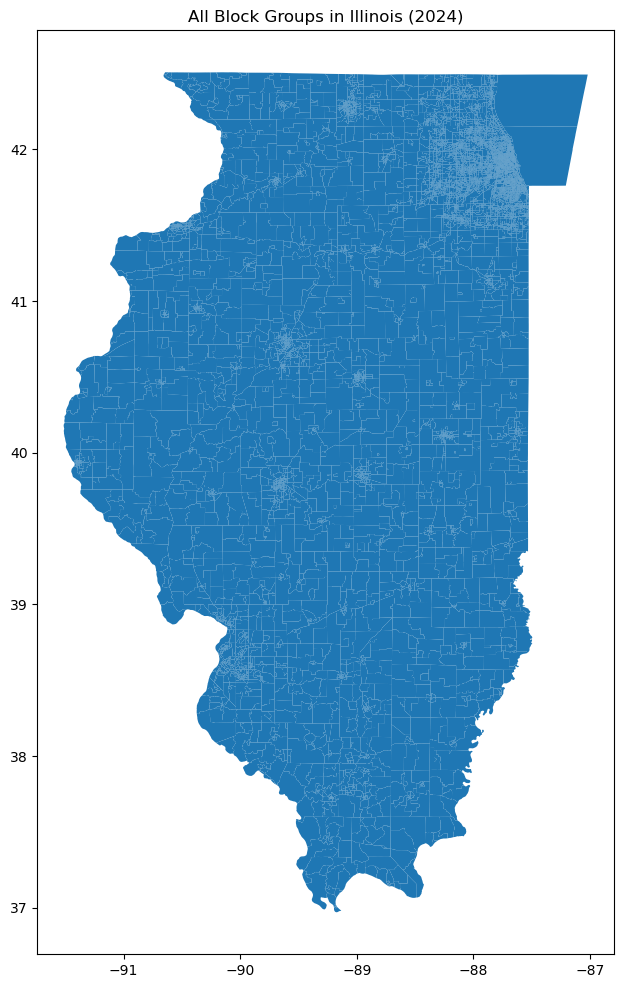

In [5]:
# Load the shapefile
gdf = gpd.read_file("C:/Users/kaur6/Downloads/Urban Analytics/tl_2024_17_bg/tl_2024_17_bg.shp")

# Print basic info
print(gdf.info()) 
print(gdf.head()) 

# Plot the block groups
gdf.plot(figsize=(12, 12))
plt.title("All Block Groups in Illinois (2024)")
plt.show()

In [7]:
# Filter block groups for Cook County (COUNTYFP == '031')
cook_gdf = gdf[gdf['COUNTYFP'] == '031']
cook_gdf.to_file("cook_county_block_groups.shp")

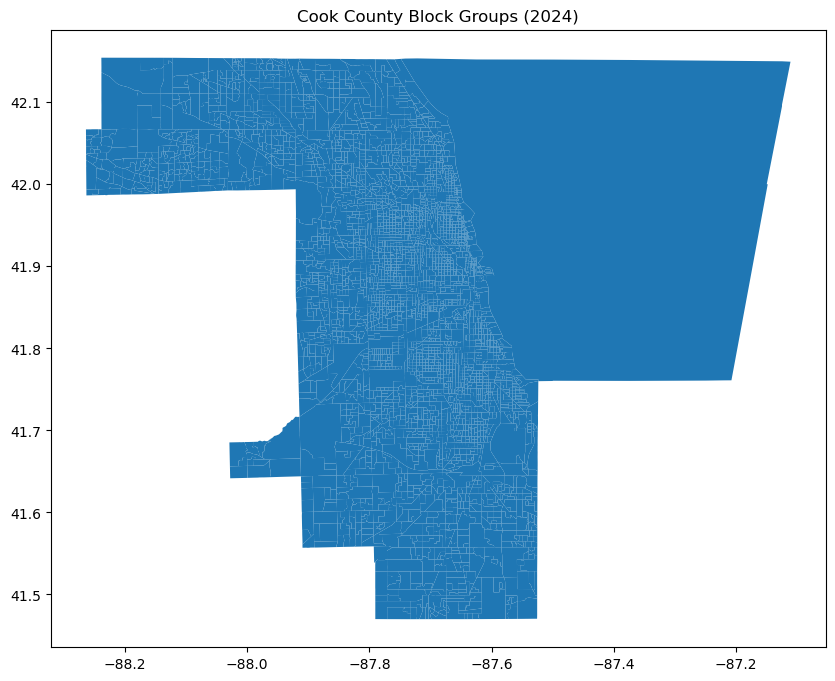

In [8]:
cook_gdf = gpd.read_file("C:/Users/kaur6/Downloads/Urban Analytics/cook_county_bg/cook_county_block_groups.shp")
cook_gdf.plot(figsize=(10, 10))
plt.title("Cook County Block Groups (2024)")
plt.show()

In [9]:
# Load Chicago city boundary from CSV (WKT format)
chicago_df = pd.read_csv("C:/Users/kaur6/Downloads/Urban Analytics/chicago_boundary.csv")
chicago_df["geometry"] = chicago_df["the_geom"].apply(wkt.loads)
chicago_boundary = gpd.GeoDataFrame(chicago_df, geometry="geometry", crs="EPSG:4326")

# Ensure both datasets use the same CRS
cook_gdf = cook_gdf.to_crs(chicago_boundary.crs)

# Spatial filter: block groups that fall within the Chicago boundary
chicago_polygon = chicago_boundary.geometry.iloc[0]
chicago_gdf = cook_gdf[cook_gdf.geometry.within(chicago_polygon)]

# Save the result
chicago_gdf.to_file("C:/Users/kaur6/Downloads/Urban Analytics/chicago_block_groups.geojson", driver="GeoJSON")

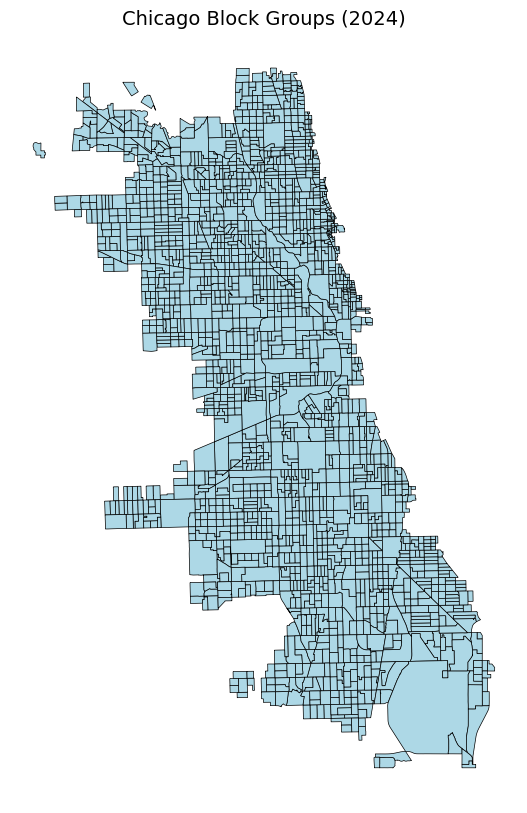

  STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID                GEOIDFQ  \
0      17      031  290900        1  170312909001  1500000US170312909001   
1      17      031  290900        2  170312909002  1500000US170312909002   
2      17      031  290900        3  170312909003  1500000US170312909003   
3      17      031  838700        2  170318387002  1500000US170318387002   
4      17      031  310200        1  170313102001  1500000US170313102001   

        NAMELSAD  MTFCC FUNCSTAT   ALAND  AWATER     INTPTLAT      INTPTLON  \
0  Block Group 1  G5030        S  164717       0  +41.8643125  -087.7275607   
1  Block Group 2  G5030        S  164694       0  +41.8606607  -087.7274518   
2  Block Group 3  G5030        S  247352       0  +41.8605723  -087.7335667   
3  Block Group 2  G5030        S  163809       0  +41.8607151  -087.7225793   
4  Block Group 1  G5030        S  193745       0  +41.8560545  -087.6432837   

                                            geometry  
0  POLYGON ((

In [10]:
# Load the filtered block groups for Chicago (if not already loaded)
chicago_gdf = gpd.read_file("C:/Users/kaur6/Downloads/Urban Analytics/chicago_block_groups.geojson")

# Plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plot Chicago block groups
chicago_gdf.plot(ax=ax, color="lightblue", edgecolor="black", linewidth=0.5)

# Title and style
ax.set_title("Chicago Block Groups (2024)", fontsize=14)
ax.axis("off")

plt.show()
print(chicago_gdf.head())